In [13]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

random.seed(8)

# Fixed parameters
N = 1000
k = 1
n = 3
trial_num = 3

def encounter(A_cooperation, B_cooperation, s):
    if A_cooperation:
        if B_cooperation:
            return (s, s) # (C, C)
        else:
            return (1, s+1) # (C, D)
    else:
        if B_cooperation:
            return (s+1, 1) # (D, C)
        else:
            return (2, 2) # (D, D)

data = pd.DataFrame([])

for s in [7]:
    for p in [2.1]:
        mutatant_winnig_num = 0
        for i in range(trial_num):        
# for s in [3, 5, 7]:
#     for p in [p*0.1 for p in range(10, 30, 1)]:
#         mutatant_winnig_num = 0
#         for i in range(trial_num):        
            # Initial configuration: all play defect except central 10 individuals play cooperate
            agents = [False for i in range(N)] # True: Cooperation ; False: Defect
            start = int((N-10)/2) + 1
            for i in range(start, start+10):
                agents[i] = True

            next_period = True
            period_num = 0
            while next_period:
                ### One period start ###
                learing_person_index = random.randrange(N)

                # calculated the average payoff of each individual -> 其實最多只需要計算該人選前後n個人的average_payoffs
                average_payoffs = [0 for i in range(N)]
                for i in range(learing_person_index-n-1, learing_person_index+n+1):
                    if i >= 0 and i+1 < N:
                        payoffs = encounter(agents[i], agents[i+1], s)
                        average_payoffs[i] += (payoffs[0] / 2)
                        average_payoffs[i+1] += (payoffs[1] / 2)
                average_payoffs[0] *= 2
                average_payoffs[N-1] *= 2

                # test whether he was permitted to learn
                learn_prob = 0
                if learing_person_index-1 >= 0:
                    if agents[learing_person_index] != agents[learing_person_index-1]: learn_prob = 1
                if learing_person_index+1 < N:
                    if agents[learing_person_index] != agents[learing_person_index+1]: learn_prob = 1
                if p <= 2: # 2 >= p >= 1
                    if learn_prob == 0 and learing_person_index-2 >= 0:
                        if agents[learing_person_index] != agents[learing_person_index-2]: learn_prob = p-1
                    if learn_prob == 0 and learing_person_index+2 < N:
                        if agents[learing_person_index] != agents[learing_person_index+2]: learn_prob = p-1
                else: # 3 >= p >= 2
                    if learn_prob == 0 and learing_person_index-2 >= 0:
                        if agents[learing_person_index] != agents[learing_person_index-2]: learn_prob = 1
                    if learn_prob == 0 and learing_person_index+2 < N:
                        if agents[learing_person_index] != agents[learing_person_index+2]: learn_prob = 1
                    if learn_prob == 0 and learing_person_index-3 >= 0:
                        if agents[learing_person_index] != agents[learing_person_index-3]: learn_prob = p-2
                    if learn_prob == 0 and learing_person_index+3 < N:
                        if agents[learing_person_index] != agents[learing_person_index+3]: learn_prob = p-2
                learn = random.choices([True, False], weights=[learn_prob, 1-learn_prob])[0]

                # stochastic learing 
                if learn:
                    learning_neighborhood = []
                    learning_neighborhood_payoffs = []
                    for i in range(learing_person_index-n, learing_person_index+n+1):
                        if i >= 0 and i < N: 
                            learning_neighborhood.append(i)
                            learning_neighborhood_payoffs.append(average_payoffs[i])

                    guru_index = random.choices(learning_neighborhood, weights=learning_neighborhood_payoffs)[0]
                    agents[learing_person_index] = agents[guru_index]
                ### One period end ###

                period_num += 1
                if period_num >= 10**7:
                    next_period = False

                if len(set(agents)) == 1:
                    next_period = False
                    if set(agents) == {True}:
                        mutatant_winnig_num += 1

                    print(period_num)

        data = data.append({"S":s, "P":p, "Total":trial_num, "Frequency":mutatant_winnig_num}, ignore_index=True)

12252
11575
4319552


In [22]:
import multiprocessing
n_cpus = multiprocessing.cpu_count()
manager = multiprocessing.Manager()
log_data = manager.list()
print("cpu count: {}".format(n_cpus))
pool = multiprocessing.Pool(n_cpus+2)
pool.starmap(play_game, args_play_games)

cpu count: 10


In [ ]:
import multiprocessing
n_cpus = multiprocessing.cpu_count()
manager = multiprocessing.Manager()
log_data = manager.list()
print("cpu count: {}".format(n_cpus))
pool = multiprocessing.Pool(n_cpus+2)
 pool.starmap(play_game, args_play_games)

cpu count: 10


In [10]:
data

,S,P,Total,Frequency
0,7.0,2.1,1.0,0.0


In [15]:
data.to_csv("outcome.csv", index=False)

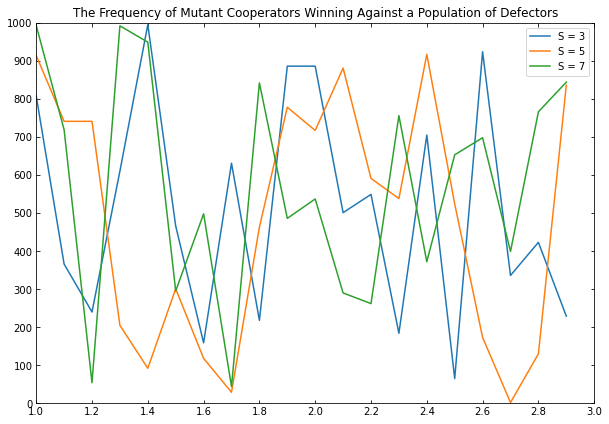

In [8]:
# data = pd.DataFrame([])
# for s in [3, 5, 7]:
#     for p in [p*0.1 for p in range(10, 30, 1)]:
#         data = data.append({"S":s, "P":p, "Frequency":random.randrange(1000)}, ignore_index=True)

x = np.array(data[data.S == 5].P)
y1 = np.array(data[data.S == 3].Frequency)
y2 = np.array(data[data.S == 5].Frequency)
y3 = np.array(data[data.S == 7].Frequency)

fig, ax= plt.subplots(1, 1, figsize=(10, 7))
ax.plot(x, y1, label = "S = 3")
ax.plot(x, y2, label = "S = 5")
ax.plot(x, y3, label = "S = 7")


ax.set_ylim(0, 1000)
ax.set_yticks(np.array(range(0, 1001, 100)))
ax.set_xlim(1, 3)
ax.set_xticks(np.arange(1.0, 3.01, 0.2))
ax.tick_params(direction="in", top="on", right="on")

plt.title("The Frequency of Mutant Cooperators Winning Against a Population of Defectors")
plt.legend(loc='upper right')
plt.savefig('Figure1.jpg')
plt.show()